In [105]:
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#Import my custom functions: https://github.com/blaylockbk/pyBKB_v2
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2/')
from BB_downloads.HRRR_S3 import get_hrrr_variable
from BB_basemap.draw_maps import draw_CONUS_HRRR_map

# Reassign Plotting Defaults
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 8]
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

cdict3 = {'red':  ((0.0,  1.0, 1.0),
                   (0.5,  0.5, 0.5),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.4, 0.4)),

         'green': ((0.0,  1.0, 1.0),
                   (0.5,  0.5, 0.5),
                   (0.5,  0.4, 0.4),
                   (1.0,  0.0, 0.0)),

         'blue':  ((0.0,  1.0, 1.0),
                   (0.5,  0.5, 0.5),
                   (0.5,  0.0, 0.0),
                   (1.0,  0.0, 0.0))
        }

plt.register_cmap(name='FirePot', data=cdict3)

In [142]:
# Fire Potential Table
RH = np.arange(0, 101, 1)
WIND = np.arange(0,36,1)
x, y = np.meshgrid(RH, WIND)

(0, 35)

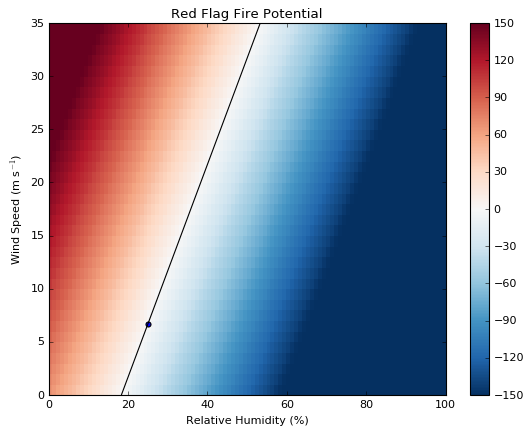

In [144]:
# Common Red Flag threshold:
rf_RH = 25       # %
rf_WIND = 6.7056 # m/s

# Linear Equation
b = (rf_RH-rf_WIND)*(rf_RH/rf_WIND)
z = -(rf_RH/rf_WIND)*(x-y)+b

plt.figure(1, figsize=[8,6])
plt.pcolormesh(x,y,z, cmap='RdBu_r', vmax=150, vmin=-150)
plt.colorbar()
plt.contour(x,y,z, colors='k', levels=[0])
plt.scatter(rf_RH, rf_WIND)

plt.title('Red Flag Fire Potential')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Wind Speed (m s$^{-1}$)') 

plt.xlim([0,100])
plt.ylim([0,35])

(0, 35)

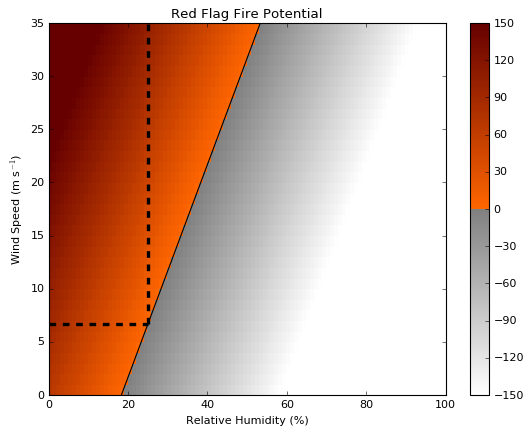

In [165]:
# Common Red Flag threshold:
#rf_RH = 23      # %
#rf_WIND = 13.4 # m/s
rf_RH = 25      # %
rf_WIND = 6.7 # m/s



# Linear Equation
b = (rf_RH-rf_WIND)*(rf_RH/rf_WIND)
z = -(rf_RH/rf_WIND)*(x-y)+b

plt.figure(1, figsize=[8,6])
plt.pcolormesh(x,y,z, cmap='FirePot', vmax=150, vmin=-150)
plt.colorbar()
plt.contour(x,y,z, colors='k', levels=[0])

plt.axhline(y=rf_WIND, xmax=rf_RH/100., ls='--', c='k', lw=3)
plt.axvline(x=rf_RH, ymin=rf_WIND/35., ls='--', c='k', lw=3)

plt.title('Red Flag Fire Potential')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Wind Speed (m s$^{-1}$)') 

plt.xlim([0,100])
plt.ylim([0,35])

## Load some HRRR Grids

In [9]:
# Make map object
m = draw_CONUS_HRRR_map()

In [26]:
DATE = datetime(2018, 1, 30)
H_rh = get_hrrr_variable(DATE, variable='RH:2 m')
H_g = get_hrrr_variable(DATE, variable='GUST:surface')

./temp_2018013000_f00_RH:.grib2

-----------------------------------------------------------------------
!! Hey! You are requesting a date that is not on the Pando archive  !!
!! That's ok, I'll redirect you to the NOMADS server. :)            !!
-----------------------------------------------------------------------

matched a variable 58:40590132:d=2018013000:RH:2 m above ground:anl:

range: 40590132 42131757
./temp_2018013000_f00_GUS.grib2

-----------------------------------------------------------------------
!! Hey! You are requesting a date that is not on the Pando archive  !!
!! That's ok, I'll redirect you to the NOMADS server. :)            !!
-----------------------------------------------------------------------

matched a variable 8:3355533:d=2018013000:GUST:surface:anl:

range: 3355533 4651534


In [27]:
lon = H_rh['lon']
lat = H_rh['lat']

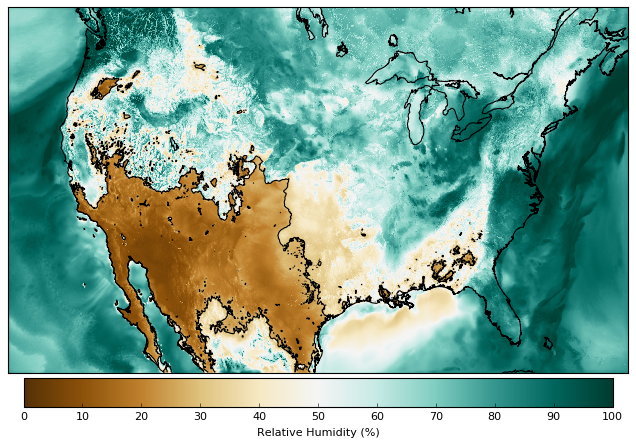

In [79]:
m.drawcoastlines()
m.pcolormesh(lon, lat, H_rh['value'],
             cmap='BrBG',
             vmax=100, vmin=0,
             latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label('Relative Humidity (%)')

m.contour(lon, lat, H_rh['value'], levels=[rf_RH], colors='k', latlon=True)

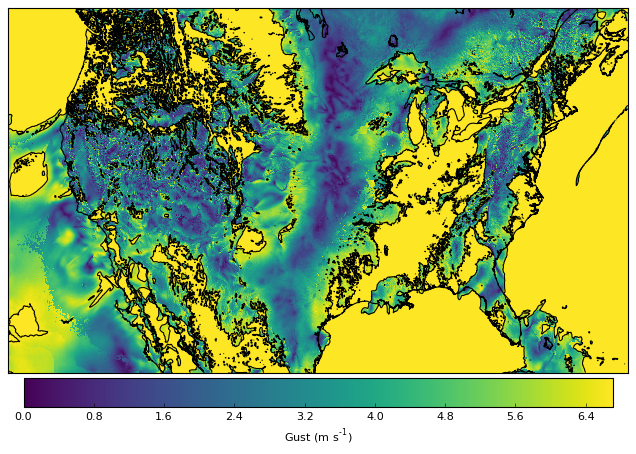

In [110]:
m.drawcoastlines()
m.pcolormesh(lon, lat, H_g['value'],
             cmap='viridis',
             latlon=True,
             vmax=rf_WIND,
             vmin=0)
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label(r'Gust (m s$\mathregular{^{-1}}$)')

m.contour(lon, lat, H_g['value'], levels=[rf_WIND], colors='k', latlon=True)

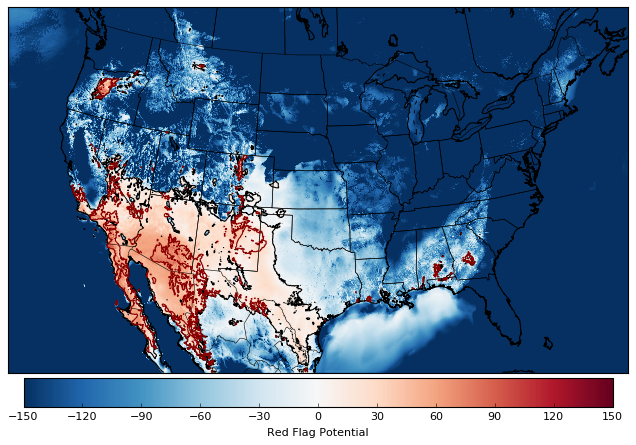

In [147]:
# Common Red Flag threshold:
rf_RH = 25        #  %
rf_WIND = 6.7056  #  m/s

# Definate Red Flag Area:
RED_FLAG = np.logical_and(H_rh['value']<rf_RH,H_g['value']>rf_WIND)

# Linear Equation
b = (rf_RH-rf_WIND)*(rf_RH/rf_WIND)
z = -(rf_RH/rf_WIND)*(H_rh['value']-H_g['value'])+b

m.drawcoastlines(); m.drawstates(); m.drawcountries()
m.pcolormesh(lon,lat,z, cmap='RdBu_r', vmax=150, vmin=-150, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label(r'Red Flag Potential')
m.contour(lon,lat,z, colors='k', levels=[0], latlon=True)

# Outline Red Flag Areas
m.contour(lon,lat, RED_FLAG, colors='darkred',
           levels=[0],
           latlon=True)

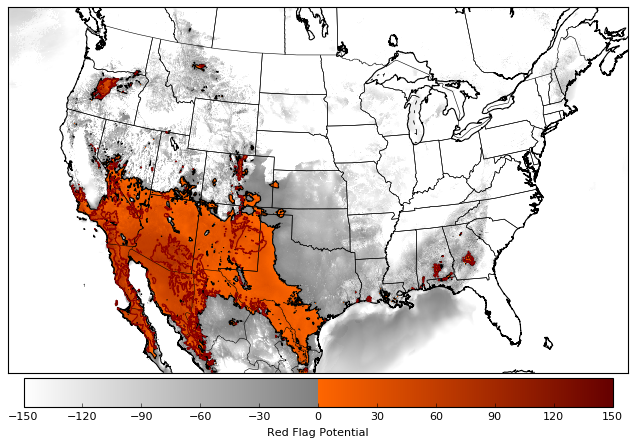

In [148]:
# Common Red Flag threshold:
rf_RH = 25        #  %
rf_WIND = 6.7056  #  m/s

# Definate Red Flag Area:
RED_FLAG = np.logical_and(H_rh['value']<rf_RH,H_g['value']>rf_WIND)

# Linear Equation
b = (rf_RH-rf_WIND)*(rf_RH/rf_WIND)
z = -(rf_RH/rf_WIND)*(H_rh['value']-H_g['value'])+b

m.drawcoastlines(); m.drawstates(); m.drawcountries()
m.pcolormesh(lon,lat,z, cmap='FirePot', vmax=150, vmin=-150, latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label(r'Red Flag Potential')
m.contour(lon,lat,z, colors='k', levels=[0], latlon=True)

# Outline Red Flag Areas
m.contour(lon,lat, RED_FLAG, colors='darkred',
           levels=[0],
           latlon=True)

# Generalized 2-condition Red Flag Warning
Generalized Only depends on if 

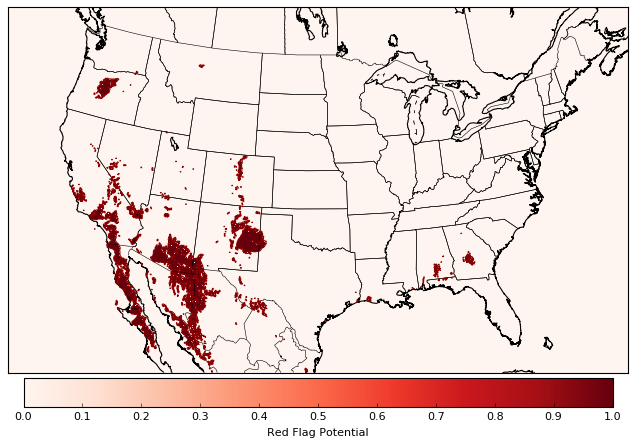

In [149]:
m.drawcoastlines(); m.drawstates(); m.drawcountries()
m.pcolormesh(lon, lat, RED_FLAG, cmap='Reds', latlon=True)
cb = plt.colorbar(orientation='horizontal', pad=0.01, shrink=0.95)
cb.set_label(r'Red Flag Potential')
m.contour(lon,lat, RED_FLAG, colors='darkred', levels=[0], latlon=True)


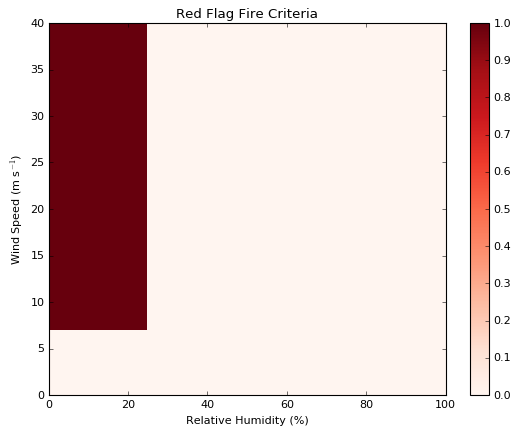

In [141]:
plt.figure(1, figsize=[8,6])
plt.pcolormesh(x,y,np.logical_and(x<rf_RH,y>rf_WIND),cmap='Reds')
plt.colorbar()
plt.title('Red Flag Fire Criteria')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Wind Speed (m s$^{-1}$)') 